## The Dataset

You will use a simplified version of the PetFinder [dataset](https://www.kaggle.com/c/petfinder-adoption-prediction). There are several thousand rows in the CSV. Each row describes a pet, and each column describes an attribute. You will use this information to predict if the pet will be adopted.

Following is a description of this dataset. Notice there are both numeric and categorical columns. There is a free text column which you will not use in this tutorial.

Column | Description| Feature Type | Data Type
------------|--------------------|----------------------|-----------------
Type | Type of animal (Dog, Cat) | Categorical | string
Age |  Age of the pet | Numerical | integer
Breed1 | Primary breed of the pet | Categorical | string
Color1 | Color 1 of pet | Categorical | string
Color2 | Color 2 of pet | Categorical | string
MaturitySize | Size at maturity | Categorical | string
FurLength | Fur length | Categorical | string
Vaccinated | Pet has been vaccinated | Categorical | string
Sterilized | Pet has been sterilized | Categorical | string
Health | Health Condition | Categorical | string
Fee | Adoption Fee | Numerical | integer
Description | Profile write-up for this pet | Text | string
PhotoAmt | Total uploaded photos for this pet | Numerical | integer
AdoptionSpeed | Speed of adoption | Classification | integer

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("pet_adopt.csv")

In [3]:
df.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,1
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,1
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,1


In [4]:
df.describe(include='all')

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
count,4999,4999.000000,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999.000000,4999.000000,4999.000000
unique,2,NaN,139,2,7,7,3,3,3,3,3,NaN,NaN,NaN
top,Dog,NaN,Mixed Breed,Female,Black,No Color,Medium,Short,Yes,No,Healthy,NaN,NaN,NaN
freq,2854,NaN,2023,2813,2293,1726,3470,2924,2198,3238,4806,NaN,NaN,NaN
mean,NaN,11.766753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.203841,3.614123,0.727145
std,NaN,19.017515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.438513,3.184366,0.445471
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,0.000000
50%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000,1.000000
75%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,1.000000


In [5]:
for i in df.items():
  print(i)
  break

('Type', 0       Cat
1       Cat
2       Dog
3       Dog
4       Dog
       ... 
4994    Cat
4995    Cat
4996    Cat
4997    Dog
4998    Dog
Name: Type, Length: 4999, dtype: object)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

3199 train examples
800 validation examples
1000 test examples


In [8]:
train.describe(include='all')

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
count,3199,3199.000000,3199,3199,3199,3199,3199,3199,3199,3199,3199,3199.000000,3199.000000,3199.000000
unique,2,NaN,119,2,7,7,3,3,3,3,3,NaN,NaN,NaN
top,Dog,NaN,Mixed Breed,Female,Black,No Color,Medium,Short,Yes,No,Healthy,NaN,NaN,NaN
freq,1832,NaN,1315,1762,1462,1104,2237,1887,1405,2090,3079,NaN,NaN,NaN
mean,NaN,11.827133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.538606,3.647390,0.728665
std,NaN,19.399082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.647324,3.236472,0.444718
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,0.000000
50%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000,1.000000
75%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,1.000000


In [9]:
import tensorflow as tf

In [10]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

In [11]:
batch_size = 32
train_dataset = df_to_dataset(train, shuffle=True, batch_size=batch_size)
val_dataset = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_dataset = df_to_dataset(test, shuffle=False, batch_size=batch_size)

- **Numerical Features**:
  - `Age`
  - `Fee`
  - `PhotoAmt`

- **Categorical Features**:
  - `Type`
  - `Breed1`
  - `Gender`
  - `Color1`
  - `Color2`
  - `MaturitySize`
  - `FurLength`
  - `Vaccinated`
  - `Sterilized`
  - `Health`

## Setup Preprocessing Layers

1. **Use Normalization for Numerical Features**:
   - Normalize features like `Age`, `Fee`, and `PhotoAmt` to scale them to a standard range or distribution.

2. **Use StringLookup for Categorical Features**:
   - Apply `StringLookup` to convert categorical features such as `Type`, `Breed1`, `Gender`, etc., into integer indices that can be used in model training.


In [12]:
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup, CategoryEncoding, Dropout, BatchNormalization, Embedding

In [13]:
numeric_features = ['Fee', 'PhotoAmt', 'Age'] 
integer_categorical_features = []
string_categorical_features = ['Type', 'Gender', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health']
high_cardinality_features = ['Breed1']

In [14]:
all_inputs = []
encoded_features = []

In [15]:
for header in numeric_features:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = Normalization(axis=None)
    normalization_layer.adapt(train[header].values)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [16]:
for header in integer_categorical_features:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
    lookup = IntegerLookup(output_mode='int')
    lookup.adapt(train[header])
    encoded_categorical_col = lookup(categorical_col)
    encoding_layer = CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode="one_hot")
    encoded_categorical_col = encoding_layer(encoded_categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

In [17]:
for header in string_categorical_features:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    # StringLookup layer for string categorical features
    lookup = StringLookup(output_mode='int')
    # Adapt the lookup layer to the data
    lookup.adapt(train[header])
    encoded_categorical_col = lookup(categorical_col)
    # One-hot encode the integer indices
    encoding_layer = CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode="one_hot")
    encoded_categorical_col = encoding_layer(encoded_categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

In [18]:
for header in high_cardinality_features:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    lookup = StringLookup(output_mode='int')
    lookup.adapt(train[header])
    encoded_categorical_col = lookup(categorical_col)
    embedding_dim = 16  # Dimension for embedding, can be tuned
    embedding_layer = Embedding(input_dim=lookup.vocabulary_size(), output_dim=embedding_dim)
    embedded_categorical_col = embedding_layer(encoded_categorical_col)
    embedded_categorical_col = tf.keras.layers.Flatten()(embedded_categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(embedded_categorical_col)

In [19]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = BatchNormalization()(all_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = Dropout(0.5)(x) 
x = BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=["accuracy"])

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Breed1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Type (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gender (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Color1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Color2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MaturitySize        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FurLength           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Vaccinated          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sterilized          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Health (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_9     │ (None, 1)         │          0 │ Breed1[0][0]      │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Fee (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PhotoAmt            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Age (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup       │ (None, 1)         │          0 │ Type[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_1     │ (None, 1)         │          0 │ Gender[0][0]      │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_2     │ (None, 1)         │          0 │ Color1[0][0]      │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_3     │ (None, 1)         │          0 │ Color2[0][0]      │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_4     │ (None, 1)         │          0 │ MaturitySize[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 5,130 (20.05 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 73 (304.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

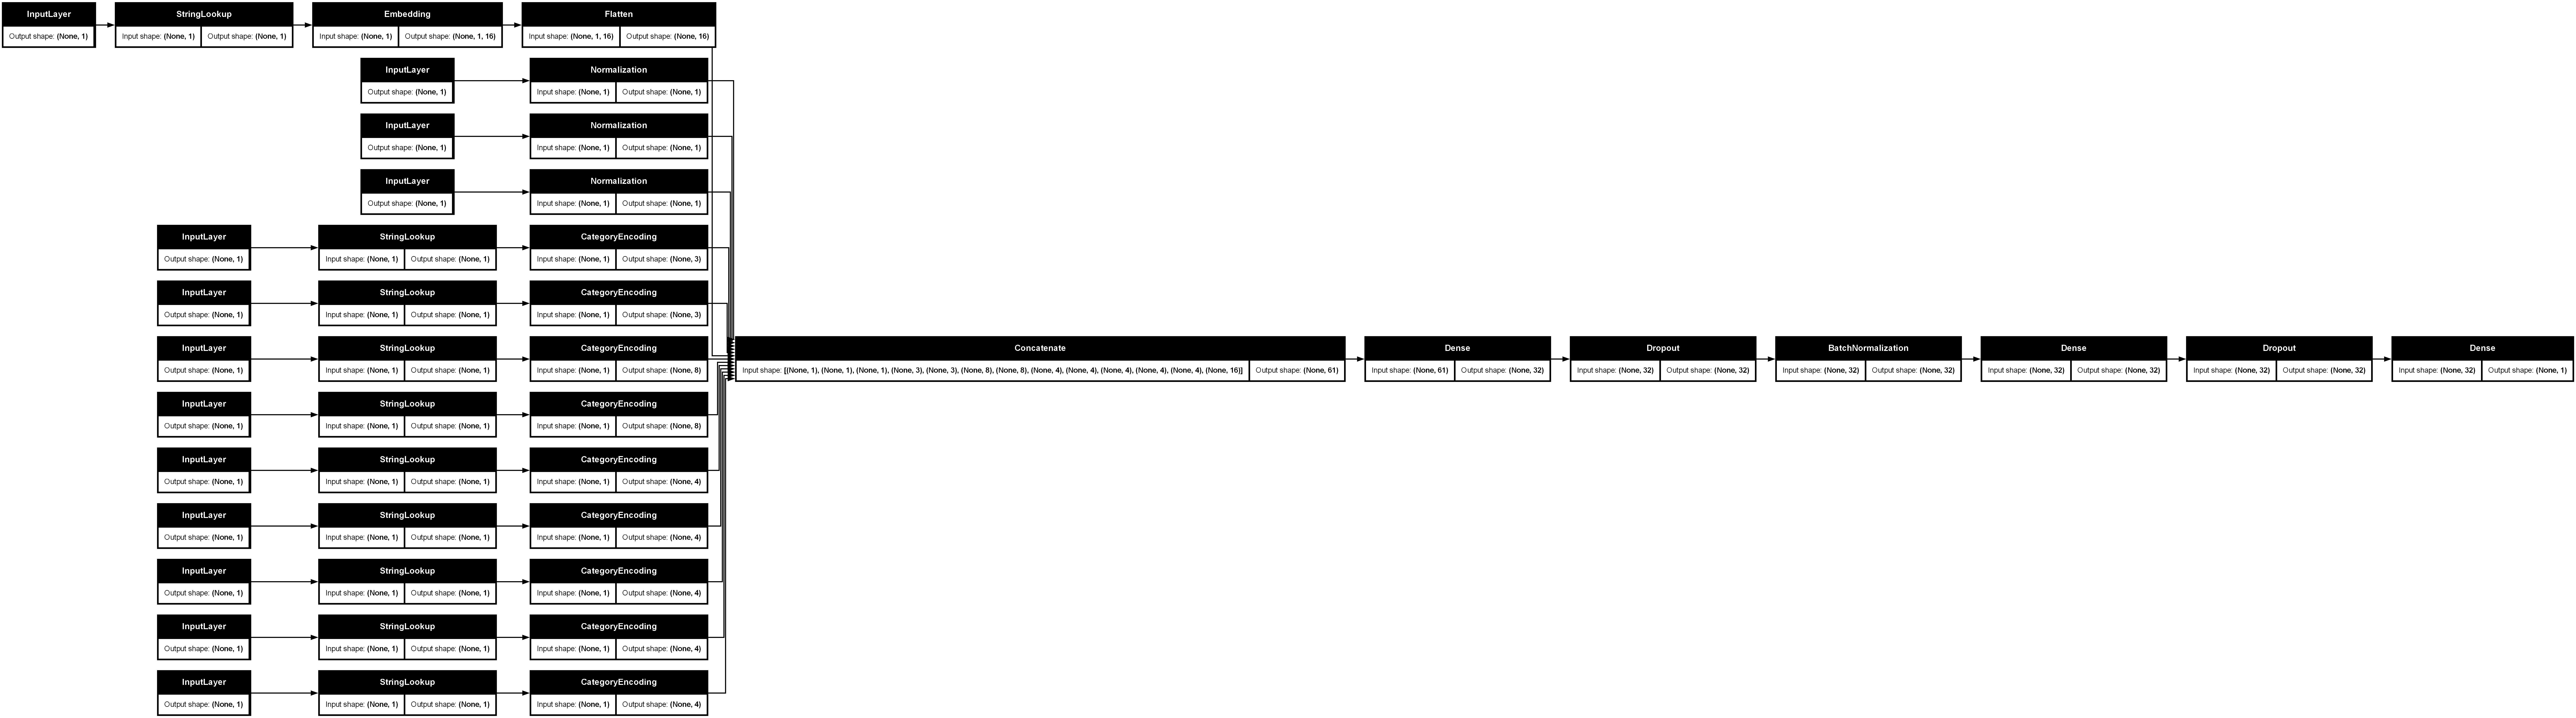

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [24]:
model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5368 - loss: 0.7763 - val_accuracy: 0.6900 - val_loss: 0.6173
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6540 - loss: 0.6526 - val_accuracy: 0.6900 - val_loss: 0.6015
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7074 - loss: 0.6021 - val_accuracy: 0.6875 - val_loss: 0.5947
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7030 - loss: 0.6087 - val_accuracy: 0.6862 - val_loss: 0.5923
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7062 - loss: 0.6010 - val_accuracy: 0.6913 - val_loss: 0.5856
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 0.5874 - val_accuracy: 0.6900 - val_loss: 0.5818
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7160 - loss: 0.5732 - val_accuracy: 0.6900 - val_loss: 0.5778
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7327 - loss: 0.5629 - val_accuracy: 0

In [25]:
loss, accuracy = model.evaluate(test_dataset)
print("Accuracy", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7412 - loss: 0.5482
Accuracy 0.7559999823570251


In [26]:
sample = {
    'Type': 'Cat',
    'Age': 3,
    'Breed1': 'Tabby',
    'Gender': 'Male',
    'Color1': 'Black',
    'Color2': 'White',
    'MaturitySize': 'Small',
    'FurLength': 'Short',
    'Vaccinated': 'No',
    'Sterilized': 'No',
    'Health': 'Healthy',
    'Fee': 100,
    'PhotoAmt': 2,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(test_dataset)
prob = tf.nn.sigmoid(predictions[0])

print(
    "This particular pet had a %.1f percent probability "
    "of getting adopted." % (100 * prob)
)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
This particular pet had a 69.4 percent probability of getting adopted.
